In [8]:
# Import libraries

import tensorflow as tf
from tensorflow.keras import Sequential, layers
import keras
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

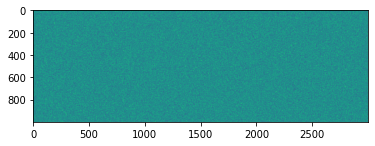

In [14]:
import numpy as np
import matplotlib.pyplot as plt

image = np.random.randint(10, size = (1000,3000))

plt.imshow(image)

>Architecture guidelines for stable Deep Convolutional GANs

>• Replace any pooling layers with strided convolutions (discriminator) and fractional-strided
convolutions (generator).

>• Use batchnorm in both the generator and the discriminator.

>• Remove fully connected hidden layers for deeper architectures.

>• Use ReLU activation in generator for all layers except for the output, which uses Tanh.

>• Use LeakyReLU activation in the discriminator for all layers.

In [3]:
## Model: Generator 
# The generator uses tf.keras.layers.Conv2DTranspose (upsampling) layers to produce an image from a seed (random noise). 

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

In [4]:
generator = keras.models.Sequential([
    keras.layers.Dense((1024*2930*1)/10, input_shape=[100]),
    keras.layers.Reshape([1024,2930,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2DTranspose(32, kernel_size = 3, strides =2, padding = 'same',activation = 'relu'),
    keras.layers.Conv2DTranspose(16, kernel_size = 3, strides =2, padding = 'same',activation = 'relu')])

NameError: name 'keras' is not defined

In [7]:
noise = tf.random.normal([1, 100])

NameError: name 'tf' is not defined

In [5]:
# Use the (as yet untrained) generator to create an image

generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

NameError: name 'tf' is not defined

In [6]:
## Model: Discriminator
# The discriminator is a CNN-based image classifier

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

In [ ]:
#### Model Compile: Loss Function 

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
#### Discriminator loss
## quantifies how well the discriminator is able to distinguish real images from fakes. 

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
#### Generator loss
## quantifies how well it was able to trick the discriminator. 
## If the generator is performing well, the discriminator will classify the fake images as real (or 1). 
## We compare the discriminators decisions on the generated images to an array of 1s.


def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
#### Model Compile: Optimizer 
## Two different optimizers since we train two separate networks:


generator_optimizer = tf.keras.optimizers.Adam(1e-4)  #SGD INSTEAD???   (Radford et al., 2015)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)   #SGD INSTEAD???  (Radford et al., 2015)